# Machine Learning
## LinearRegression

In [1]:
import pandas as pd

In [36]:
dic={"exp":[2,3,4,5,6],"salary":[70,82,111,115,130]}


In [37]:
data=pd.DataFrame(dic)

In [10]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

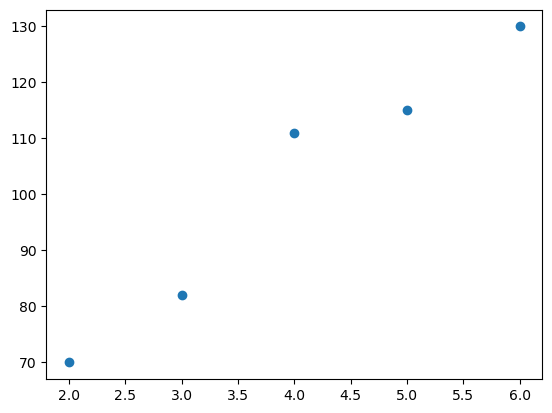

In [40]:
plt.scatter(np.array(data["exp"]),np.array(data["salary"]))

In [4]:
from sklearn.linear_model import LinearRegression

In [41]:
model=LinearRegression()

In [42]:
model.fit(data[["exp"]],data["salary"])

LinearRegression()

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
model.predict([[8]])

array([162.8])

In [44]:
data[['salary']]

salary
0      70
1      82
2     111
3     115
4     130

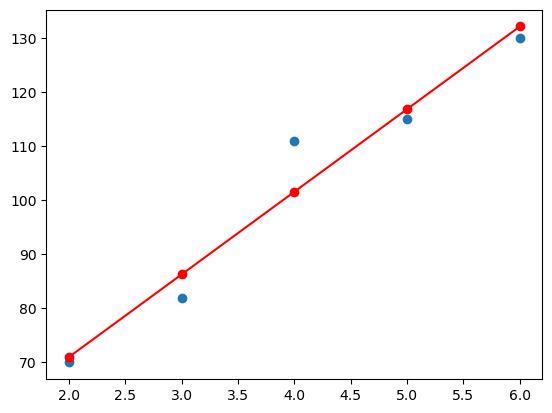

In [45]:
plt.scatter(np.array(data["exp"]),np.array(data["salary"]))
plt.plot(np.array(data["exp"]),model.predict(data[['exp']]),marker='o',color='red')

In [32]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [46]:
r2_score(data[['salary']],model.predict(data[['exp']]))

0.9526697053556894

In [47]:
model.coef_

array([15.3])

In [48]:
model.intercept_

40.399999999999984

In [49]:
mean_absolute_error(data[['salary']],model.predict(data[['exp']]))

3.7599999999999936

In [50]:
mean_squared_error(data[['salary']],model.predict(data[['exp']]))**(1/2)

4.822862220714996

## Multiple Linear Regression 25/11/2024

In [7]:
dic={"exp":[2,3,4,5,6],"W_d":[8,9,6,4,5],"salary":[74,88,98,100,130]}

In [8]:
data=pd.DataFrame(dic)

In [9]:
data

exp  W_d  salary
0    2    8      74
1    3    9      88
2    4    6      98
3    5    4     100
4    6    5     130

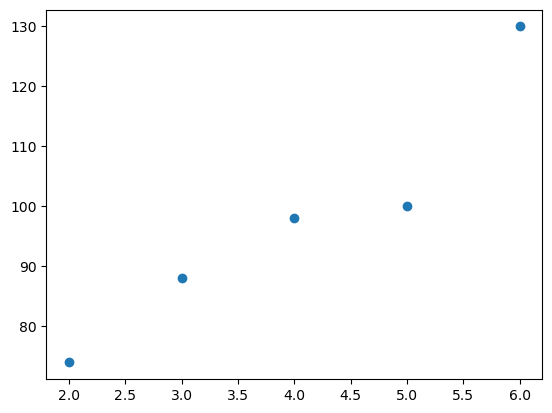

In [11]:
plt.scatter(np.array(data["exp"]),np.array(data["salary"]))

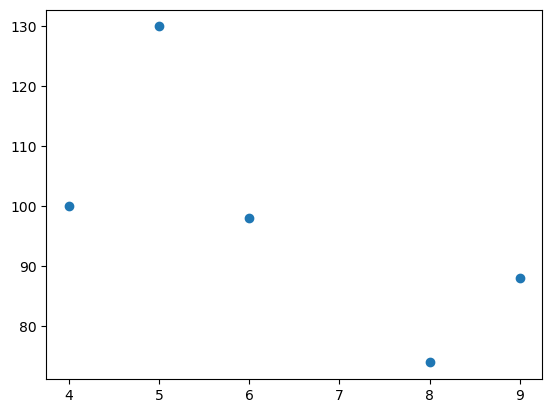

In [13]:
plt.scatter(np.array(data["W_d"]),np.array(data["salary"]))

## 3D plot

In [14]:
import plotly.express as exp

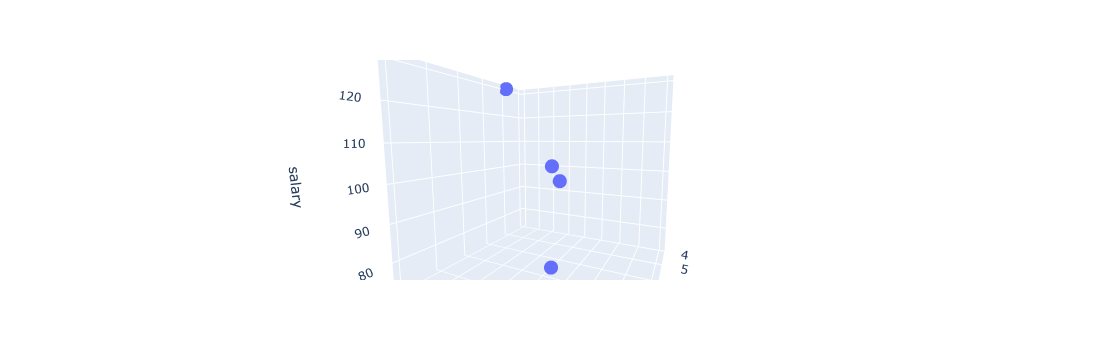

In [15]:
exp.scatter_3d(data_frame=data,x='exp',y='W_d',z='salary')

In [16]:
model=LinearRegression()

In [17]:
x=data[['exp','W_d']]

In [19]:
y=data["salary"]

In [20]:
model.fit(x,y)

LinearRegression()

In [21]:
model.predict([[4,2]])

array([78.6745098])

In [22]:
model.coef_

array([17.23137255,  4.39215686])

In [23]:
model.intercept_

0.964705882352888

In [27]:
model.predict(x)

array([ 70.56470588,  92.18823529,  96.24313725, 104.69019608,
       126.31372549])

In [33]:
data

exp  W_d  salary
0    2    8      74
1    3    9      88
2    4    6      98
3    5    4     100
4    6    5     130

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [29]:
r2_score(y,model.predict(x))

0.9600846911534566

In [35]:
round(r2_score(y,model.predict(x)),2)   ## converted into 2 decimals

0.96

In [36]:
mean_absolute_error(y,model.predict(x))   ###absolute means -(negative) converted to posive + 

3.551372549019612

In [30]:
round(mean_absolute_error(y,model.predict(x)),2)  ## in 2 decimals

3.55

In [28]:
mean_squared_error(y,model.predict(x))**(1/2)

3.6882431122286374

In [32]:
round(mean_squared_error(y,model.predict(x))**(1/2),3)## in 2 decimals

3.688

### training and testing data

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,random_state=2)

In [39]:
x_train

exp  W_d
1    3    9
3    5    4
0    2    8

In [40]:
x_test

exp  W_d
2    4    6
4    6    5

In [46]:
##another method to find r2 score
model.score(x_train,y_train)

0.8484040360006897

In [42]:
r2_score(y_train,model.predict(x_train))

0.8484040360006897

In [44]:
##another method to find r2 score
model.score(x_test,y_test)

0.9674312764321417

In [45]:
r2_score(y_test,model.predict(x_test))

0.9674312764321417

In [ ]:
##lasso and linear pending

# Featues and Encoding
## Label encoding

In [1]:
import pandas as pd

In [2]:
dic={"exp":[2,3,4,5,6],"W_d":[8,9,6,4,5],"Company":['#','Microsoft','Google','Amazon','Google'],"salary":[74,88,98,100,130]}

In [3]:
data=pd.DataFrame(dic)

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
enc=LabelEncoder()

In [6]:
enc.fit(data['Company'])

LabelEncoder()

In [7]:
data['Company1']=enc.transform(data['Company'])

In [46]:
enc.inverse_transform(data[['Company']])

ValueError: could not convert string to float: '#'

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create the DataFrame
dic = {
    "exp": [2, 3, 4, 5, 6],
    "W_d": [8, 9, 6, 4, 5],
    "Company": ['#', 'Microsoft', 'Google', 'Amazon', 'Google'],
    "salary": [74, 88, 98, 100, 130]
}
data = pd.DataFrame(dic)

# Initialize LabelEncoder
enc = LabelEncoder()

# Fit and transform the 'Company' column
data['Company1'] = enc.fit_transform(data['Company'])

# To inverse transform, use the 1D encoded values
decoded = enc.inverse_transform(data['Company1'])
data['Decoded_Company'] = decoded

print(data)


   exp  W_d    Company  salary  Company1 Decoded_Company
0    2    8          #      74         0               #
1    3    9  Microsoft      88         3       Microsoft
2    4    6     Google      98         2          Google
3    5    4     Amazon     100         1          Amazon
4    6    5     Google     130         2          Google


In [21]:
enc.classes_

array(['#', 'Amazon', 'Google', 'Microsoft'], dtype=object)

In [22]:
data

exp  W_d    Company  salary  Company1
0    2    8          #      74         0
1    3    9  Microsoft      88         3
2    4    6     Google      98         2
3    5    4     Amazon     100         1
4    6    5     Google     130         2

### get.dummies encoding

In [24]:
df1=pd.get_dummies(data['Company'])

In [25]:
pd.concat((data,df1),axis=1)

exp  W_d    Company  salary  Company1      #  Amazon  Google  Microsoft
0    2    8          #      74         0   True   False   False      False
1    3    9  Microsoft      88         3  False   False   False       True
2    4    6     Google      98         2  False   False    True      False
3    5    4     Amazon     100         1  False    True   False      False
4    6    5     Google     130         2  False   False    True      False

In [27]:
pd.from_dummies(df1)   ### to see location of label in the data

0          #
1  Microsoft
2     Google
3     Amazon
4     Google

In [30]:
df1.idxmax(axis=1)    ### to see location of label in the data above and this same purpuse

0            #
1    Microsoft
2       Google
3       Amazon
4       Google
dtype: object

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
enc=OneHotEncoder()

In [40]:
enc.fit_transform(data[['Company']]).toarray()

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [41]:
enc.categories_

[array(['#', 'Amazon', 'Google', 'Microsoft'], dtype=object)]

In [43]:
pd.DataFrame(enc.fit_transform(data[["Company"]]).toarray(),columns=enc.categories_)

# Amazon Google Microsoft
0  1.0    0.0    0.0       0.0
1  0.0    0.0    0.0       1.0
2  0.0    0.0    1.0       0.0
3  0.0    1.0    0.0       0.0
4  0.0    0.0    1.0       0.0

## Featues and scaling getting data between 0 and 1   29/11/2024

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Feature Scaling Resource16994544271 (1).csv")

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
import seaborn as sns

<Axes: ylabel='Density'>

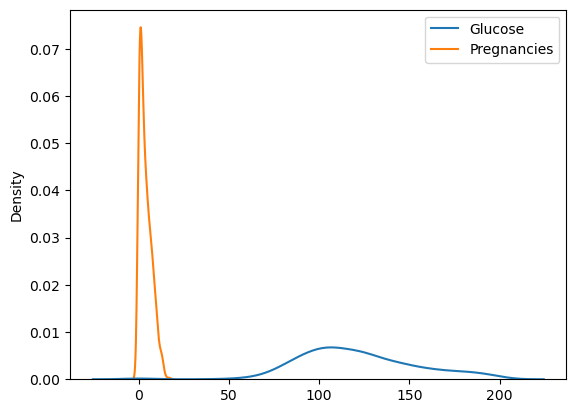

In [16]:
sns.kdeplot(df[['Glucose','Pregnancies']])  ### this graph isnot properly destrbuted

In [29]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler

## MinMaxScaler for sided data

In [30]:
sc1=MinMaxScaler()    # to get data in between 0 and 1 format

In [31]:
df1=sc.fit_transform(df[['Glucose','Pregnancies']])

In [32]:
df1

array([[0.74371859, 0.35294118],
       [0.42713568, 0.05882353],
       [0.91959799, 0.47058824],
       ...,
       [0.6080402 , 0.29411765],
       [0.63316583, 0.05882353],
       [0.46733668, 0.05882353]])

In [33]:
sns.kdeplot(df1)

<Axes: ylabel='Density'>

In [24]:
df['Pregnancies'].hist()

<Axes: >

In [25]:
df['Glucose'].hist()

<Axes: >

<Axes: ylabel='Count'>

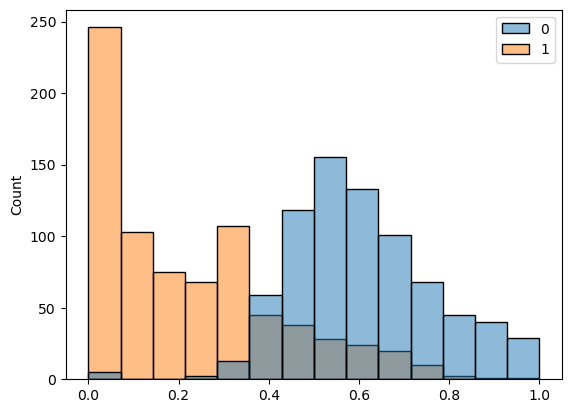

In [34]:
sns.histplot(df1)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

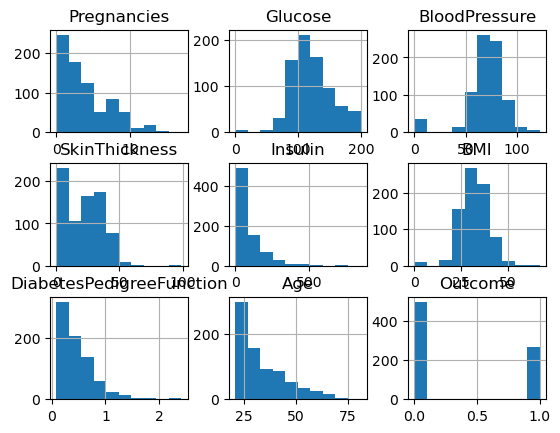

In [27]:
df.hist()

##  TIP if data is on sided i.e left or right in hist() use min max scaler

In [35]:
### Standard scaler
sc2=StandardScaler()

In [36]:
df[['Glucose','BloodPressure']]

Glucose  BloodPressure
0        148             72
1         85             66
2        183             64
3         89             66
4        137             40
..       ...            ...
763      101             76
764      122             70
765      121             72
766      126             60
767       93             70

[768 rows x 2 columns]

<Axes: ylabel='Density'>

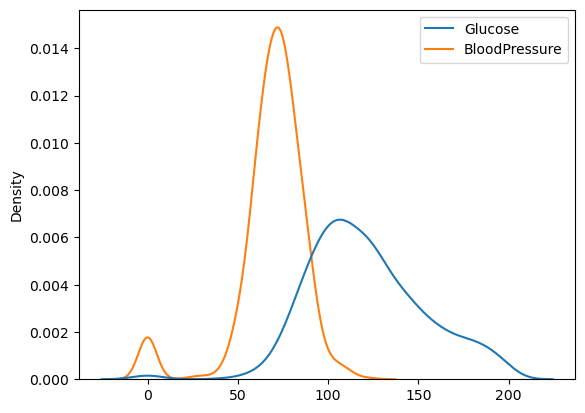

In [37]:
sns.kdeplot(df[['Glucose','BloodPressure']])

In [38]:
df2=sc2.fit_transform(df[['Glucose','BloodPressure']])

In [39]:
sns.kdeplot(df2)   ###it will try to match the foots of the given data 

<Axes: ylabel='Density'>

### RoburstScaler for outliers normalization

In [41]:
sc3=RobustScaler()

In [42]:
df3=sc3.fit_transform(df[['Glucose','BloodPressure']])

<Axes: ylabel='Density'>

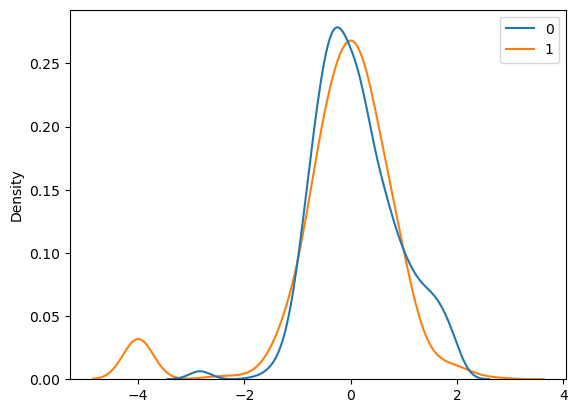

In [43]:
sns.kdeplot(df3)    ### IT will focus to match the tip not the foot of given data

## to check all the data 

<Axes: ylabel='Density'>

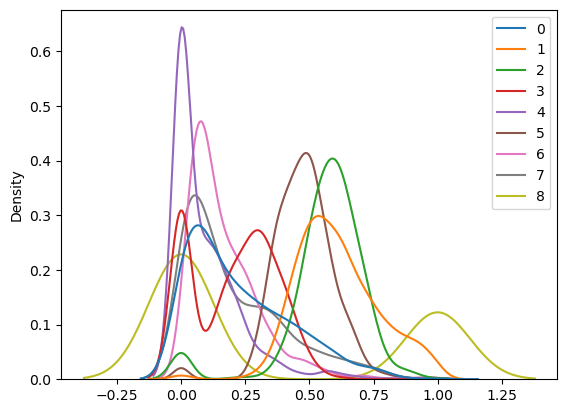

In [47]:
sns.kdeplot(sc1.fit_transform(df))   ##NinMAx scaler data

<Axes: ylabel='Density'>

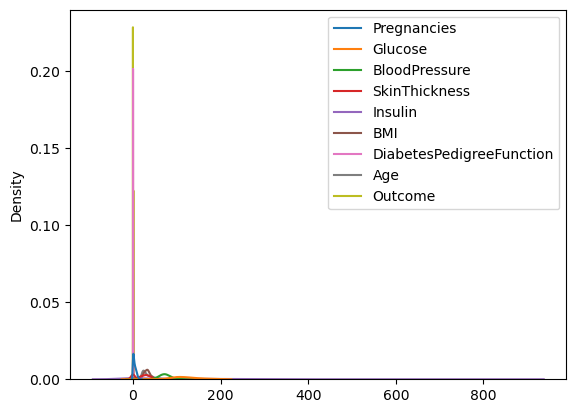

In [46]:
sns.kdeplot(df)   ## without Sta

# Doubt session Scaler

In [28]:
import numpy as np
## np.random() 50 = 50 mean, 10=std deviation of 10., 100= random samples 100
arr=np.random.normal(50,10,100).astype(int).reshape(100,1)  
arr

array([[61],
       [58],
       [63],
       [31],
       [57],
       [47],
       [45],
       [50],
       [44],
       [52],
       [30],
       [46],
       [41],
       [57],
       [41],
       [35],
       [47],
       [54],
       [54],
       [50],
       [62],
       [38],
       [58],
       [55],
       [54],
       [60],
       [52],
       [48],
       [48],
       [51],
       [63],
       [54],
       [49],
       [48],
       [49],
       [48],
       [70],
       [59],
       [48],
       [59],
       [46],
       [49],
       [51],
       [38],
       [64],
       [35],
       [39],
       [40],
       [37],
       [54],
       [33],
       [44],
       [36],
       [48],
       [48],
       [65],
       [54],
       [53],
       [63],
       [54],
       [55],
       [38],
       [53],
       [52],
       [48],
       [52],
       [48],
       [40],
       [29],
       [57],
       [24],
       [35],
       [31],
       [41],
       [42],
       [51],
       [51],

### Explanation of arr=np.random.normal(50,10,100).astype(int).reshape(100,1)  

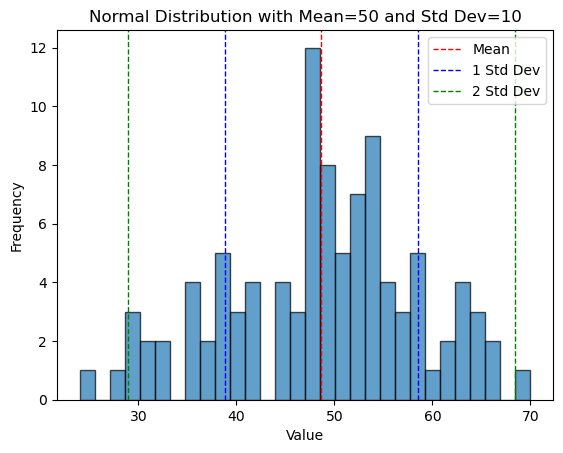

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 random samples from a normal distribution with mean=50 and std=10
data = arr

# Plotting the histogram
plt.hist(data, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(np.mean(data), color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(np.mean(data) + np.std(data), color='b', linestyle='dashed', linewidth=1, label='1 Std Dev')
plt.axvline(np.mean(data) - np.std(data), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(data) + 2*np.std(data), color='g', linestyle='dashed', linewidth=1, label='2 Std Dev')
plt.axvline(np.mean(data) - 2*np.std(data), color='g', linestyle='dashed', linewidth=1)

plt.title('Normal Distribution with Mean=50 and Std Dev=10')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


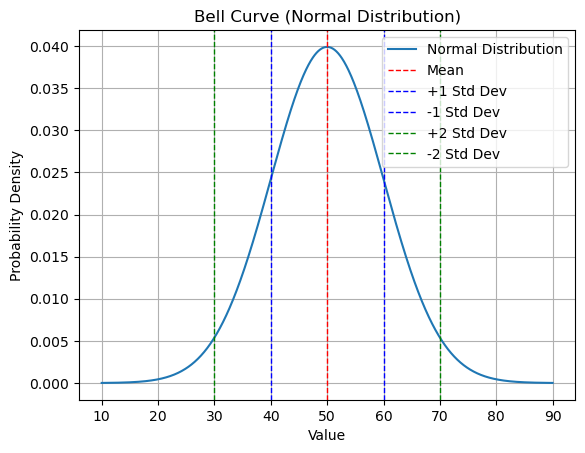

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mean = 50
std_dev = 10

# Generate data points
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)

# Plot the bell curve
plt.plot(x, y, label='Normal Distribution')

# Adding lines for the mean and standard deviations
plt.axvline(mean, color='r', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mean + std_dev, color='b', linestyle='dashed', linewidth=1, label='+1 Std Dev')
plt.axvline(mean - std_dev, color='b', linestyle='dashed', linewidth=1, label='-1 Std Dev')
plt.axvline(mean + 2*std_dev, color='g', linestyle='dashed', linewidth=1, label='+2 Std Dev')
plt.axvline(mean - 2*std_dev, color='g', linestyle='dashed', linewidth=1, label='-2 Std Dev')

# Add labels and title
plt.title('Bell Curve (Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
arr1=np.random.normal(80000,20000,100).astype(int).reshape(100,1)
arr1

array([[105007],
       [ 76774],
       [ 84746],
       [ 68334],
       [ 75635],
       [ 72711],
       [ 44936],
       [110651],
       [ 75971],
       [ 75812],
       [ 50054],
       [ 78061],
       [ 66309],
       [ 78553],
       [111736],
       [ 47835],
       [ 86456],
       [102609],
       [115000],
       [ 64400],
       [105314],
       [ 92253],
       [ 72985],
       [ 62302],
       [ 59854],
       [ 66073],
       [101484],
       [ 89999],
       [124939],
       [ 67887],
       [ 83135],
       [ 88404],
       [ 90503],
       [111437],
       [109077],
       [ 79421],
       [ 69980],
       [ 77233],
       [ 88579],
       [ 91456],
       [ 77168],
       [ 83469],
       [106671],
       [ 54543],
       [ 81040],
       [ 76884],
       [ 59808],
       [ 89520],
       [ 85787],
       [ 79670],
       [ 77576],
       [ 82150],
       [ 83644],
       [ 94251],
       [ 67732],
       [ 63407],
       [ 86080],
       [ 87954],
       [ 48963

In [5]:
import matplotlib.pyplot as plt

In [7]:
arrjoin= np.concatenate((arr,arr1),axis=1)

(array([[100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   5.,  13.,  23.,  30.,  14.,  12.,   3.]]),
 array([2.20000e+01, 1.27740e+04, 2.55260e+04, 3.82780e+04, 5.10300e+04,
        6.37820e+04, 7.65340e+04, 8.92860e+04, 1.02038e+05, 1.14790e+05,
        1.27542e+05]),
 <a list of 2 BarContainer objects>)

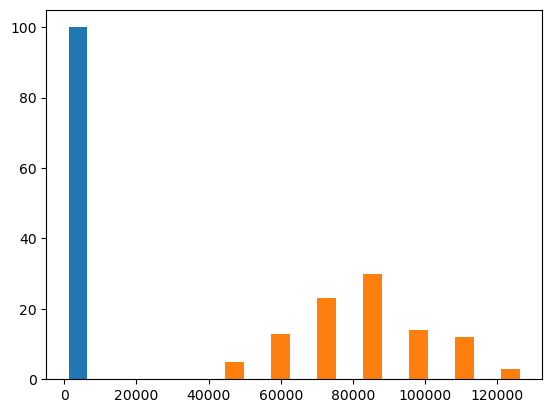

In [8]:
plt.hist(arrjoin)

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [11]:
sc= MinMaxScaler()

In [12]:
sc.fit(arrjoin)

MinMaxScaler()

In [13]:
arr2=sc.transform(arrjoin)

(array([[ 2.,  2.,  9., 15., 26., 15., 19.,  9.,  1.,  2.],
        [ 5.,  7., 16., 15., 20., 16.,  6., 10.,  3.,  2.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

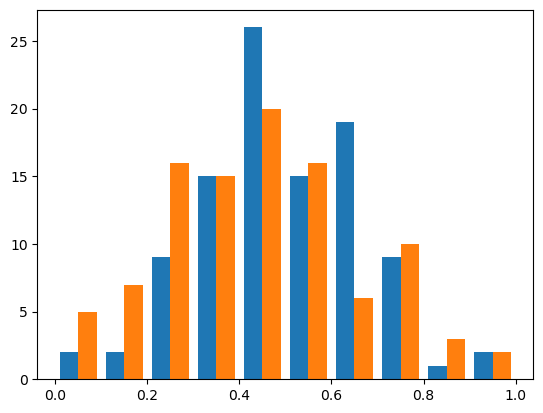

In [14]:
plt.hist(arr2)

In [15]:
import seaborn as sns

In [16]:
sns.histplot(arr2)

<Axes: ylabel='Count'>

<Axes: ylabel='Density'>

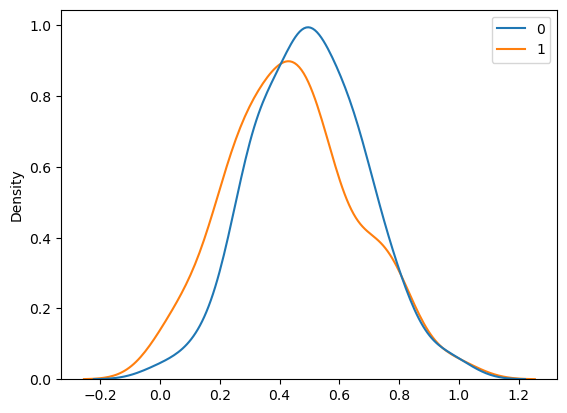

In [18]:
sns.kdeplot(arr2)

In [19]:
sc1= RobustScaler()

In [21]:
arr3=sc1.fit_transform(arrjoin)

In [22]:
sns.histplot(arr3)

<Axes: ylabel='Count'>

<Axes: ylabel='Density'>

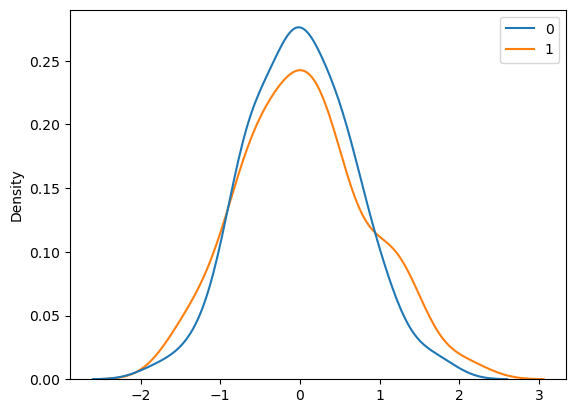

In [23]:
sns.kdeplot(arr3)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6b4618b90>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6b4618fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6b4618950>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6b4619550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6b4619850>],
 'means': []}

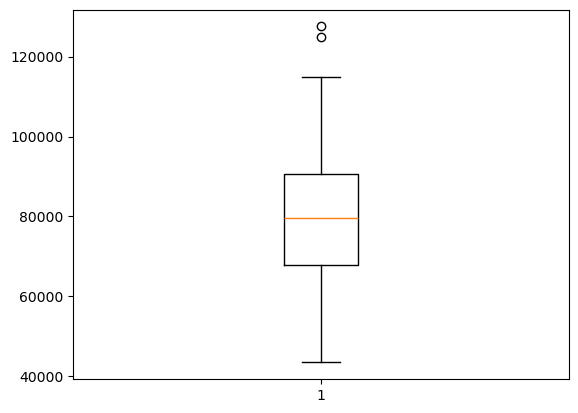

In [25]:
plt.boxplot(arr1)

# ML Outlier Removal

## Z-score  for handling outliers

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\Feature Scaling Resource16994544271 (1).csv')

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

{'whiskers': [<matplotlib.lines.Line2D at 0x209e2e0f830>,
 'caps': [<matplotlib.lines.Line2D at 0x209e2e0fcb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x209e2e0f4a0>],
 'medians': [<matplotlib.lines.Line2D at 0x209e2e2c290>],
 'fliers': [<matplotlib.lines.Line2D at 0x209e2e2c590>],
 'means': []}

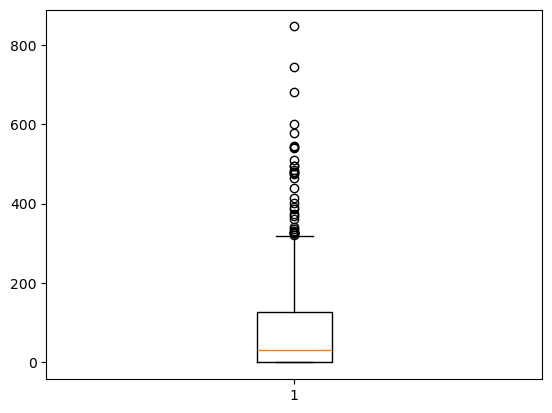

In [4]:
import matplotlib.pyplot as plt
plt.boxplot(df['Insulin'])

In [6]:
df=df[['Insulin']]

In [7]:
mean=df['Insulin'].mean()

In [8]:
std=df['Insulin'].std()

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df['z_score']=(df['Insulin'])/std

In [12]:
df

Insulin   z_score
0          0  0.000000
1          0  0.000000
2          0  0.000000
3         94  0.815661
4        168  1.457777
..       ...       ...
763      180  1.561903
764        0  0.000000
765      112  0.971851
766        0  0.000000
767        0  0.000000

[768 rows x 2 columns]

In [13]:
df[(df['z_score']>3)|(df['z_score']<-3)]

Insulin   z_score
8        543  4.711742
13       846  7.340946
111      495  4.295234
153      485  4.208462
186      495  4.295234
220      478  4.147721
228      744  6.455867
231      370  3.210579
247      680  5.900524
248      402  3.488251
258      375  3.253965
286      545  4.729096
296      360  3.123807
370      465  4.034917
392      415  3.601055
409      579  5.024123
415      474  4.113012
486      480  4.165076
584      600  5.206345
645      440  3.817986
655      540  4.685710
695      480  4.165076
710      387  3.358092
715      392  3.401479
753      510  4.425393

In [14]:
df[~(df['z_score']>3)|(df['z_score']<-3)]

Insulin   z_score
0          0  0.000000
1          0  0.000000
2          0  0.000000
3         94  0.815661
4        168  1.457777
..       ...       ...
763      180  1.561903
764        0  0.000000
765      112  0.971851
766        0  0.000000
767        0  0.000000

[743 rows x 2 columns]

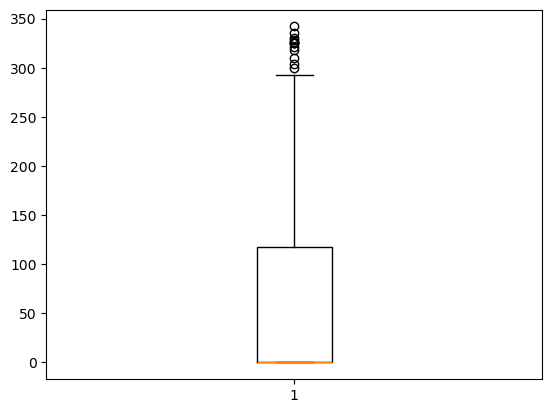

In [17]:
plt.boxplot(df[((df['z_score']<3)& (df['z_score']>-3))]['Insulin']);

##  Boundry method for handling outliers

In [18]:
mean

79.79947916666667

In [19]:
std

115.24400235133837

In [22]:
lowerBoundry=mean-3*std

In [23]:
UpperBoundry=mean+3*std

In [25]:
df[(df['Insulin']>lowerBoundry)&(df['Insulin']<UpperBoundry)]

Insulin   z_score
0          0  0.000000
1          0  0.000000
2          0  0.000000
3         94  0.815661
4        168  1.457777
..       ...       ...
763      180  1.561903
764        0  0.000000
765      112  0.971851
766        0  0.000000
767        0  0.000000

[750 rows x 2 columns]

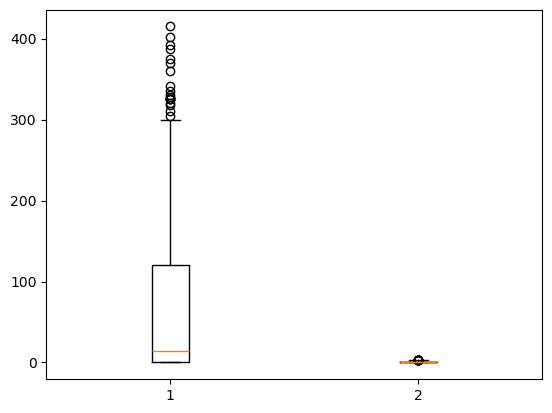

In [26]:
plt.boxplot(df[(df['Insulin']>lowerBoundry)&(df['Insulin']<UpperBoundry)]);

In [28]:
df.describe()

Insulin     z_score
count  768.000000  768.000000
mean    79.799479    0.692439
std    115.244002    1.000000
min      0.000000    0.000000
25%      0.000000    0.000000
50%     30.500000    0.264656
75%    127.250000    1.104179
max    846.000000    7.340946

In [29]:
import numpy as np

In [30]:
uq,lq=np.percentile(df['Insulin'],(75,25))  #### numbers used by the industry 

In [32]:
iqr=uq-lb

In [33]:
lb=lq-1.5*iqr  #### numbers used by the industry 

In [34]:
ub=uq+1.5*iqr #### numbers used by the industry 

In [35]:
df[(df['Insulin']>lb)&(df['Insulin']<ub)]

Insulin   z_score
0          0  0.000000
1          0  0.000000
2          0  0.000000
3         94  0.815661
4        168  1.457777
..       ...       ...
763      180  1.561903
764        0  0.000000
765      112  0.971851
766        0  0.000000
767        0  0.000000

[766 rows x 2 columns]

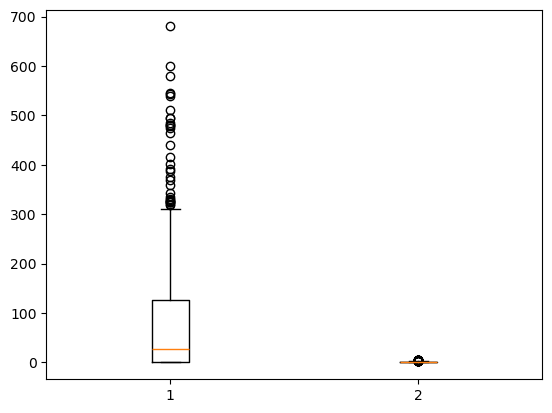

In [36]:
plt.boxplot(df[(df['Insulin']>lb)&(df['Insulin']<ub)]);

In [37]:
ub

717.0237918310225

# Logistic Regression

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv(r'C:\Users\DELL\Downloads\feature & scaling\ML Logistics Regression Files16958214402 (1).csv')

In [4]:
df1.head()

age  bought_insurance
0   22                 0
1   25                 0
2   47                 1
3   52                 0
4   46                 1

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


In [7]:
df1.describe()

age  bought_insurance
count  27.000000         27.000000
mean   39.666667          0.518519
std    15.745573          0.509175
min    18.000000          0.000000
25%    25.000000          0.000000
50%    45.000000          1.000000
75%    54.500000          1.000000
max    62.000000          1.000000

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

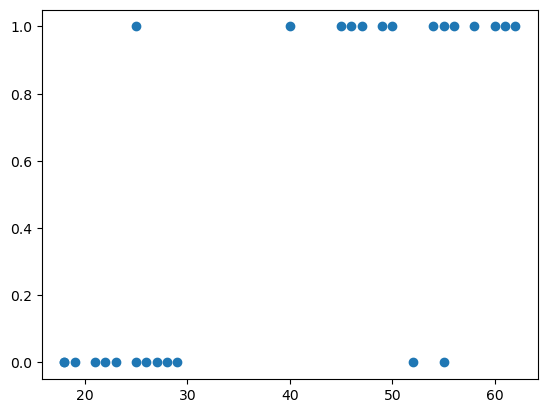

In [14]:
plt.scatter(df1['age'],df1['bought_insurance']);

In [15]:
from sklearn.model_selection import train_test_split

In [27]:
x=df1[['age']]

In [17]:
y=df1['bought_insurance']

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6,random_state=40)

In [40]:
x_test

age
2    47
16   25
19   18
14   49
15   55
13   29
20   21
3    52
26   23
21   26
11   28

In [41]:
y_test

2     1
16    1
19    0
14    1
15    1
13    0
20    0
3     0
26    0
21    0
11    0
Name: bought_insurance, dtype: int64

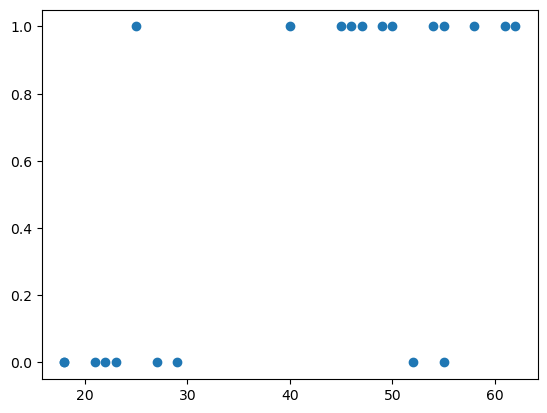

In [31]:
plt.scatter(x_train,y_train)

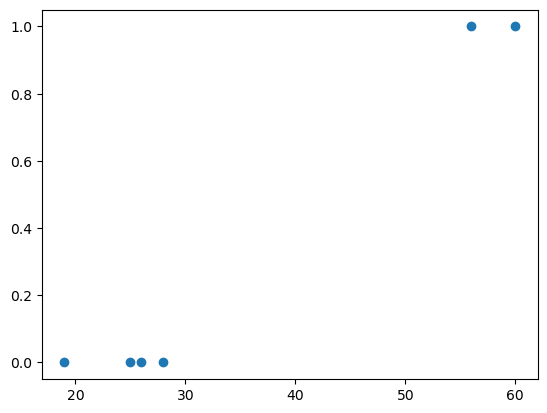

In [23]:
plt.scatter(x_test,y_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [42]:
model=LogisticRegression()

In [43]:
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
model.predict([[25]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [45]:
model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
y_test

2     1
16    1
19    0
14    1
15    1
13    0
20    0
3     0
26    0
21    0
11    0
Name: bought_insurance, dtype: int64

In [47]:
model.score(x_train,y_train)

0.9375

In [48]:
model.score(x_test,y_test)

0.8181818181818182

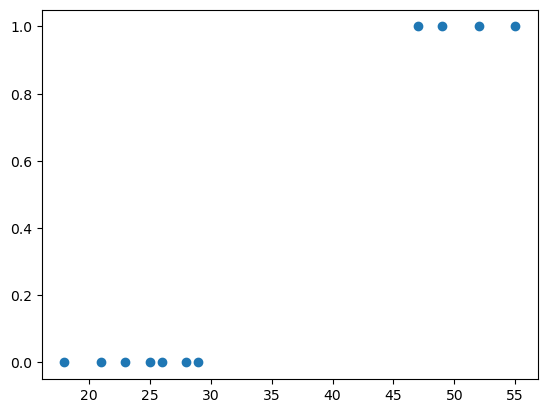

In [49]:
plt.scatter(x_test,model.predict(x_test))

In [50]:
from sklearn.metrics import confusion_matrix,precision_score,classification_report

In [51]:
confusion_matrix(y_test,model.predict(x_test))

array([[6, 1],
       [1, 3]], dtype=int64)

<Axes: >

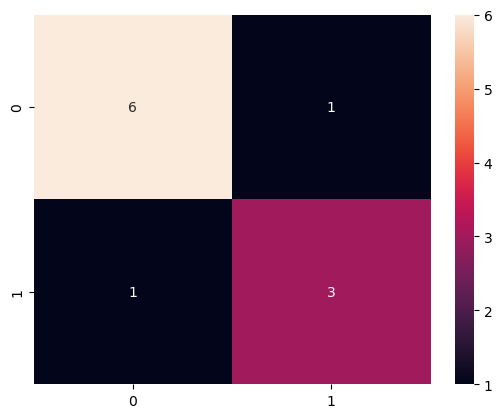

In [53]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)

In [54]:
precision_score(y_test,model.predict(x_test))

0.75

In [55]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.75      0.75      0.75         4

    accuracy                           0.82        11
   macro avg       0.80      0.80      0.80        11
weighted avg       0.82      0.82      0.82        11



In [43]:
model.predict(x_test)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

## SVM

In [1]:
import pandas as 

In [2]:
data= pd.read_csv(r'C:\Users\DELL\Downloads\ML SVM Resource 16936477690 (1).csv')

In [3]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
x=data.drop('target',axis=1)

In [7]:
y=data['target']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=10)

In [15]:
x_test

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
246   56    0   0       134   409    0        0      150      1      1.9   
183   58    1   2       112   230    0        0      165      0      2.5   
229   64    1   2       125   309    0        1      131      1      1.8   
126   47    1   0       112   204    0        1      143      0      0.1   
184   50    1   0       150   243    0        0      128      0      2.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
277   57    1   1       124   261    0        1      141      0      0.3   
121   59    1   0       138   271    0        0      182      0      0.0   
187   54    1   0       124   266    0        0      109      1      2.2   
301   57    1   0       130   131    0        1      115      1      1.2   
283   40    1   0       152   223    0        1      181      0      0.0   

     slope  ca  thal  
246      1   2     3  
183      1   1     3  
229      1   0     3  
126      2   0     2  
184      1   0     3  
..     ...  ..   ...  
277      2   0     3  
121      2   0     2  
187      1   1     3  
301      1   1     3  
283      2   0     3  

[61 rows x 13 columns]

In [12]:
from sklearn.svm import SVC

In [40]:
model=SVC(kernel='poly',C=1000,degree=4)   ### change the kernel n all to get bettter accuracy,hit and try

In [41]:
model.fit(x_train,y_train)

SVC(C=1000, degree=4, kernel='poly')

In [16]:
x_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
286   59    1   3       134   204    0        1      162      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   
242   64    1   0       145   212    0        0      132      0      2.0   
65    35    0   0       138   183    0        1      182      0      1.4   
35    46    0   2       142   177    0        0      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
156   47    1   2       130   253    0        1      179      0      0.0   
123   54    0   2       108   267    0        0      167      0      0.0   
15    50    0   2       120   219    0        1      158      0      1.6   
125   34    0   1       118   210    0        1      192      0      0.7   
265   66    1   0       112   212    0        0      132      1      0.1   

     slope  ca  thal  
286      2   2     2  
102      2   2     2  
242      1   2     1  
65       2   0     2  
35       0   0     2  
..     ...  ..   ...  
156      2   0     2  
123      2   0     2  
15       1   0     2  
125      2   0     2  
265      2   1     2  

[242 rows x 13 columns]

In [18]:
model.predict(x.loc[[125]])

array([1], dtype=int64)

In [22]:
y.loc[[125]]

125    1
Name: target, dtype: int64

In [33]:
model.score(x_train,y_train)

0.8636363636363636

In [34]:
model.score(x_test,y_test)

0.8032786885245902

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [35]:
confusion_matrix(y_test,model.predict(x_test))

array([[27,  8],
       [ 4, 22]], dtype=int64)

<Axes: >

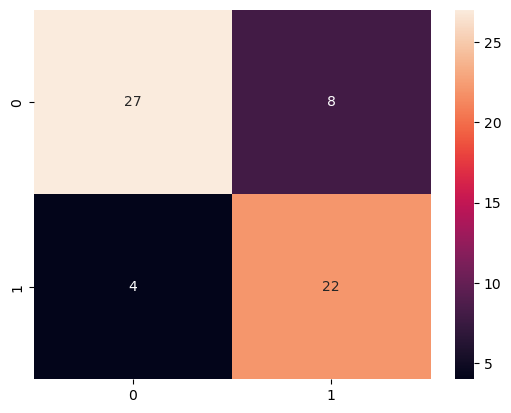

In [37]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)

In [42]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



### Naive byases   works on probablity

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
model= GaussianNB()

In [47]:
model.fit(x_train,y_train)

GaussianNB()

In [48]:
model.score(x_train,y_train)

0.8553719008264463

In [49]:
model.score(x_test,y_test)

0.7868852459016393

<Axes: >

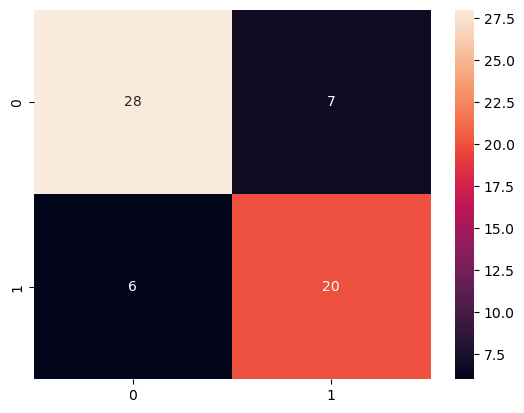

In [50]:
sns.heatmap(confusion_matrix(y_test,model.predict(x_test)),annot=True)

In [51]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.74      0.77      0.75        26

    accuracy                           0.79        61
   macro avg       0.78      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



## Decision tree

In [9]:
import pandas as pd

In [10]:
df= pd.read_csv(r'C:\Users\DELL\Downloads\ML Decision Tree Resources 16936475981.csv')
df

company                  job     degree  salary_more_then_50000
0     Reliance      sales executive  bachelors                       0
1     Reliance      sales executive    masters                       0
2     Reliance     business manager  bachelors                       1
3     Reliance     business manager    masters                       1
4     Reliance  computer programmer  bachelors                       0
5     Reliance  computer programmer    masters                       1
6      Torrent      sales executive    masters                       0
7      Torrent  computer programmer  bachelors                       0
8      Torrent     business manager  bachelors                       0
9      Torrent     business manager    masters                       1
10  Sun Pharma      sales executive  bachelors                       1
11  Sun Pharma      sales executive    masters                       1
12  Sun Pharma     business manager  bachelors                       1
13  Sun Pharma     business manager    masters                       1
14  Sun Pharma  computer programmer  bachelors                       1
15  Sun Pharma  computer programmer    masters                       1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   company                 16 non-null     object
 1   job                     16 non-null     object
 2   degree                  16 non-null     object
 3   salary_more_then_50000  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [11]:
df.columns=['company','job','degree','salary']

In [8]:
df

company                  job     degree  salary
0     Reliance      sales executive  bachelors       0
1     Reliance      sales executive    masters       0
2     Reliance     business manager  bachelors       1
3     Reliance     business manager    masters       1
4     Reliance  computer programmer  bachelors       0
5     Reliance  computer programmer    masters       1
6      Torrent      sales executive    masters       0
7      Torrent  computer programmer  bachelors       0
8      Torrent     business manager  bachelors       0
9      Torrent     business manager    masters       1
10  Sun Pharma      sales executive  bachelors       1
11  Sun Pharma      sales executive    masters       1
12  Sun Pharma     business manager  bachelors       1
13  Sun Pharma     business manager    masters       1
14  Sun Pharma  computer programmer  bachelors       1
15  Sun Pharma  computer programmer    masters       1

In [25]:
y=df['salary']

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
enc=LabelEncoder()

In [28]:
x=x.apply(enc.fit_transform)

In [29]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=20)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
model= DecisionTreeClassifier(max_depth=2)

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [38]:
model.predict([[1,0,1]])
model.predict(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 0, 1], dtype=int64)

In [39]:
model.score(x_train,y_train)

0.75

In [40]:
model.score(x_test,y_test)

0.75

In [42]:
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'x[0] <= 1.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.25, 0.5, 'x[0] <= 0.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.5, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

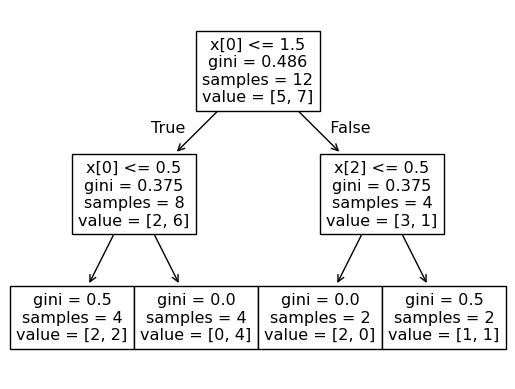

In [43]:
tree.plot_tree(model)

In [44]:
df= pd.read_csv(r'C:\Users\DELL\Downloads\ML SVM Resource 16936477690 (1).csv')

In [45]:
x=df.drop('target',axis=1)

In [46]:
y=df['target']

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(200,random_state=20,max_depth=3)

## KNN 

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\ML KNN Resource16936476241.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [14]:
x= df.drop('Outcome',axis=1)
y=df["Outcome"]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=10)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
model= KNeighborsClassifier(n_neighbors=10)

In [55]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [56]:
model.score(x_train,y_train)

0.7320261437908496

In [53]:
model.score(x_test,y_test)

0.7300813008130081

In [22]:
model.predict(x.loc[[0]])

array([1], dtype=int64)

In [34]:
train=[]
test=[]
for i in range(1,30):
    model= KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    train.append(model.score(x_train,y_train))
    test.append(model.score(x_test,y_test))

In [27]:
train

[1.0,
 0.7973856209150327,
 0.8169934640522876,
 0.7973856209150327,
 0.803921568627451,
 0.7843137254901961,
 0.7712418300653595,
 0.7712418300653595,
 0.7647058823529411,
 0.7450980392156863,
 0.7320261437908496,
 0.7254901960784313,
 0.7320261437908496,
 0.7254901960784313,
 0.738562091503268,
 0.7189542483660131,
 0.7320261437908496,
 0.738562091503268,
 0.7254901960784313,
 0.7320261437908496,
 0.7254901960784313,
 0.7254901960784313,
 0.7320261437908496,
 0.7189542483660131,
 0.7254901960784313,
 0.7320261437908496,
 0.7320261437908496,
 0.7320261437908496,
 0.7254901960784313]

In [28]:
test

[0.6260162601626016,
 0.6682926829268293,
 0.6552845528455284,
 0.6780487804878049,
 0.656910569105691,
 0.6845528455284553,
 0.6829268292682927,
 0.6796747967479675,
 0.6829268292682927,
 0.6829268292682927,
 0.6926829268292682,
 0.6829268292682927,
 0.6845528455284553,
 0.6764227642276422,
 0.6910569105691057,
 0.6731707317073171,
 0.6943089430894309,
 0.6878048780487804,
 0.6991869918699187,
 0.6926829268292682,
 0.6910569105691057,
 0.6861788617886179,
 0.6845528455284553,
 0.6861788617886179,
 0.6910569105691057,
 0.6813008130081301,
 0.6813008130081301,
 0.6861788617886179,
 0.6878048780487804]

In [29]:
import matplotlib.pyplot as plt

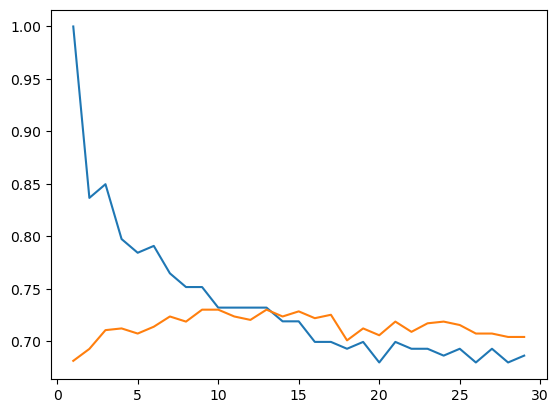

In [35]:
plt.plot(range(1,30),train)
plt.plot(range(1,30),test)

<function matplotlib.pyplot.show(close=None, block=None)>

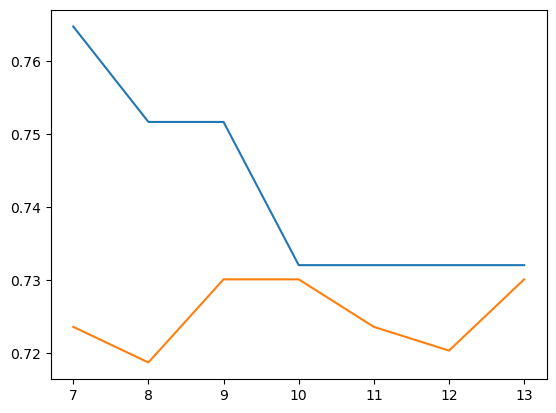

In [57]:
plt.plot(range(7,14),train[6:13])
plt.plot(range(7,14),test[6:13])
plt.show

# K- Means (Unsupervised learning)

In [1]:
import pandas as pd

In [67]:
data= pd.read_csv(r'C:\Users\DELL\Downloads\ML Clustering Resources16936475700.csv')

In [41]:
data

Age  Income($)
0    27      70000
1    29      90000
2    29      61000
3    28      60000
4    42     150000
5    39     155000
6    41     160000
7    38     162000
8    36     156000
9    35     130000
10   37     137000
11   26      45000
12   27      48000
13   28      51000
14   29      49500
15   32      53000
16   40      65000
17   41      63000
18   43      64000
19   39      80000
20   41      82000
21   39      58000

In [5]:
data.describe()

Age      Income($)
count  22.000000      22.000000
mean   34.818182   90431.818182
std     5.901060   43505.964412
min    26.000000   45000.000000
25%    29.000000   58500.000000
50%    36.500000   67500.000000
75%    39.750000  135250.000000
max    43.000000  162000.000000

In [8]:
import matplotlib.pyplot as plt

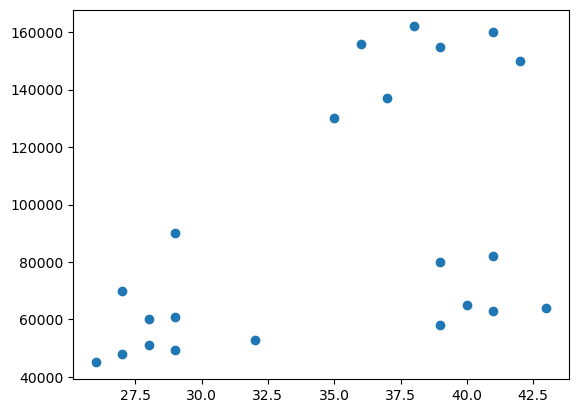

In [9]:
plt.scatter(data['Age'],data['Income($)'])

In [10]:
from sklearn.cluster import KMeans

In [11]:
model=KMeans(n_clusters=3)

In [12]:
model.fit(data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
data['group']=model.predict(data)

In [18]:
import seaborn as sns

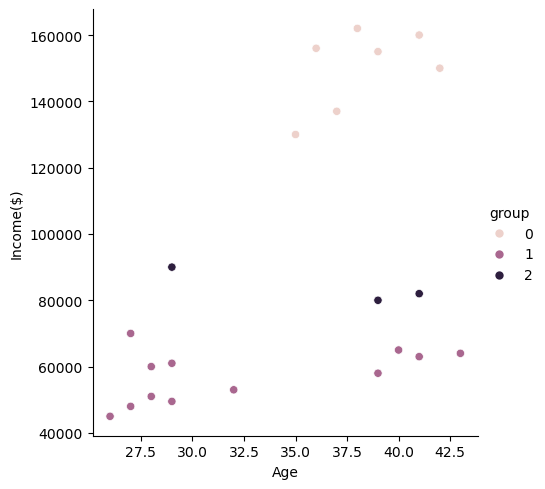

In [21]:
sns.relplot(x=data['Age'],y=data['Income($)'],hue=data['group'])

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
silhouette_score(data,data['group'])

0.6817458576831205

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
sc=MinMaxScaler()

In [70]:
data1=pd.DataFrame(sc.fit_transform(data),columns=data.columns)

In [71]:
from sklearn.cluster import KMeans

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
model1=KMeans(n_clusters=3)

In [74]:
model1.fit(data1)

KMeans(n_clusters=3)

In [75]:
data1['group']=model1.predict(data1)

In [76]:
silhouette_score(data1,data1['group'])

0.8440618526317888

In [77]:
#sc.inverse_transform(data1.loc[1],['Age','Income($)']])
sc.inverse_transform(data1.loc[[1], ['Age', 'Income($)']])


array([[2.9e+01, 9.0e+04]])

# Hirarchial Cluster

In [59]:
data2=pd.read_csv(r'C:\Users\DELL\Downloads\ML Clustering Resources16936475700.csv')

In [60]:
from scipy.cluster.hierarchy import linkage,dendrogram

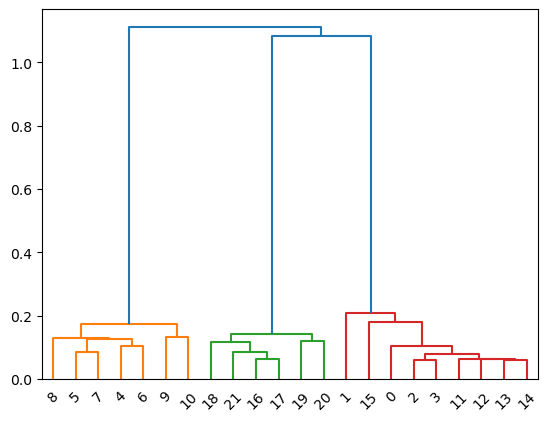

In [61]:
dendrogram(linkage(data));

In [62]:
from sklearn.cluster import AgglomerativeClustering

In [63]:
model=AgglomerativeClustering(n_clusters=3,linkage='single')

In [65]:
data2['group']=model.fit_predict(data2)

In [ ]:
da